In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

In [2]:

# Load the dataset
# Kaggle-specific path for the dataset
training = pd.read_csv('/home/dhpcap/ML_module/project/kagg/Training.csv')

# Check for missing values and handle them
if training.isna().sum().sum() > 0:
    print("Missing values detected. Filling with zeros.")
    training.fillna(0, inplace=True)  # Replace NaN with 0 or use another strategy

# Label encoding for the target variable
label_encoder = LabelEncoder()
X = training.drop(['prognosis'], axis=1)
y_e = training['prognosis']
y = label_encoder.fit_transform(y_e)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict for a single instance
df2 = pd.DataFrame(columns=X_test.columns)
df2 = pd.concat([df2, X_test.iloc[[2]]], axis=0, ignore_index=True)  # Use test set's third row for prediction

# Ensure no missing values in df2
df2.fillna(0, inplace=True)

m = rf.predict(df2)
dis = label_encoder.inverse_transform(y_pred)

for i, label in enumerate(dis):
    print(f"Test instance : {i} predicted prognosis : {label}")

#print('You should have to do test of:', dis)
#print('You should have to do test of:', dis)

Missing values detected. Filling with zeros.
Accuracy: 1.0
Test instance : 0 predicted prognosis : Acne
Test instance : 1 predicted prognosis : Acne
Test instance : 2 predicted prognosis : Hyperthyroidism
Test instance : 3 predicted prognosis : AIDS
Test instance : 4 predicted prognosis : Chronic cholestasis
Test instance : 5 predicted prognosis : Hypertension 
Test instance : 6 predicted prognosis : Hypoglycemia
Test instance : 7 predicted prognosis : Arthritis
Test instance : 8 predicted prognosis : Hepatitis B
Test instance : 9 predicted prognosis : Migraine
Test instance : 10 predicted prognosis : Urinary tract infection
Test instance : 11 predicted prognosis : Diabetes 
Test instance : 12 predicted prognosis : Hepatitis D
Test instance : 13 predicted prognosis : Psoriasis
Test instance : 14 predicted prognosis : Alcoholic hepatitis
Test instance : 15 predicted prognosis : Alcoholic hepatitis
Test instance : 16 predicted prognosis : Dimorphic hemmorhoids(piles)
Test instance : 17 p

/tmp/ipykernel_43837/4092678201.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2 = pd.concat([df2, X_test.iloc[[2]]], axis=0, ignore_index=True)  # Use test set's third row for prediction


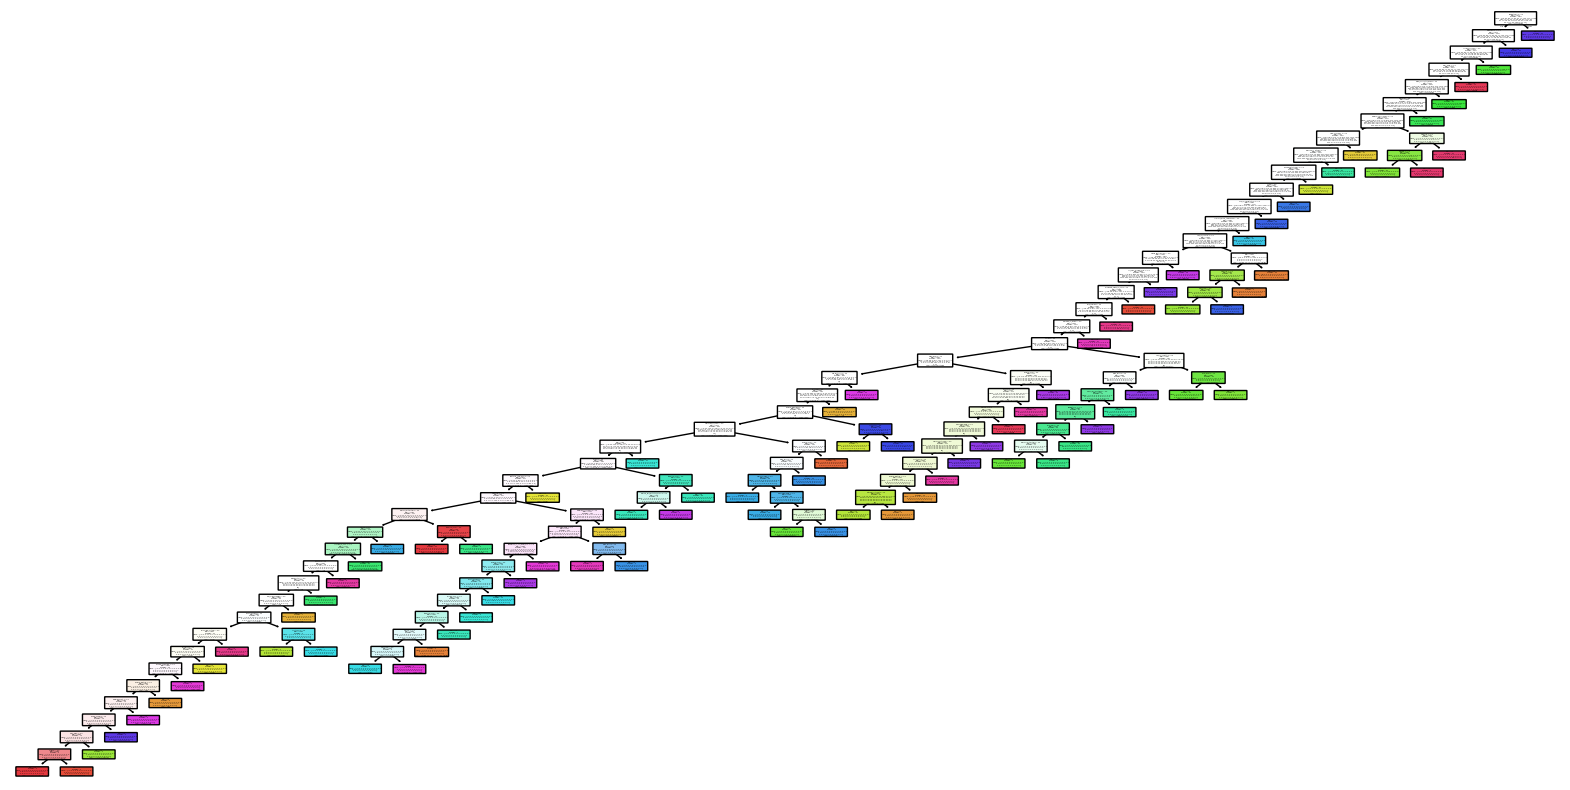

In [3]:
tree = rf.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,          # Feature names from the DataFrame
    class_names=label_encoder.classes_,  # Class names from the label encoder
    filled=True,
    rounded=True
)
plt.show()